In [3]:
import pandas as pd

def load_some_data(path, separ = ','):
    return pd.read_csv(path, sep=separ, parse_dates = ['datetime'], index_col='datetime')

events_battle = load_some_data(r'data/events_battle.txt')
events_hero = load_some_data(r'data/events_hero.txt')
events_level = load_some_data(r'data/events_level.txt', '\t')
events_payment = pd.read_csv(r'data/events_payment.txt', parse_dates = ['created'], index_col='created')
events_quest = load_some_data(r'data/events_quest.txt')
events_resource = load_some_data(r'data/events_resource.txt')
events_user = load_some_data(r'data/events_user.txt')

In [4]:

def get_relation_on_battles(ds1, ds2):
    t1 = ds1[['user_id', 'status']].groupby('user_id').agg('count')
    t2 = ds2[['user_id', 'status']].groupby('user_id').agg('count')
    return t1 / t2


In [5]:
#объявление всех сетов битв для анализа
no_bot = events_battle.loc[events_battle['opponent_type'] != 'bot']
duel = events_battle.loc[events_battle['kind'] =='duel']
only_bot = events_battle.loc[events_battle['opponent_type'] == 'bot']
duels_with_bots = events_battle.loc[(events_battle['opponent_type'] == 'bot') & (events_battle['kind'] =='duel')] #zero
duels_with_supers = duels_with_bots = events_battle.loc[(events_battle['opponent_race_id'] == 'super-hero') & (events_battle['kind'] =='duel')]#zero
#набор с челиками, которые создали одного перса - ниже

In [6]:
#самая популярная раса
#если что, то superhero - раса по умолчанию
events_hero.copy()[["user_id", "race"]].groupby("race").agg('count')

,user_id
race,
elf,1626
human,1472
orc,1221
super-hero,6075


In [7]:
#самая играбельная раса для каждого игрока
def get_most_race(ds):
    cur_race = pd.merge(ds, events_hero, on = 'hero_id')
    return cur_race.groupby("user_id_x")['race'].agg(lambda x: pd.Series.mode(x)[0]).to_frame()


In [8]:
#распределение винрейтов расс в датасете
def get_race_winrate_disturb(df):
    tmp = pd.merge(df, events_hero, on = 'hero_id')
    tmp = tmp[['race', 'status']]
    win = tmp.reset_index().loc[tmp['status'] == 'win'].groupby('race')[['status']].agg('count')
    win.fillna(0, inplace = True)
    tmp = tmp.reset_index().groupby('race')[['status']].agg('count')
    return (win/tmp).fillna(0)
    

In [9]:
def get_players_winrates(df):
    win = df.loc[df['status'] == 'win'][['user_id','status']].groupby('user_id').agg('count')
    tot = df[['user_id','status']].groupby('user_id').agg('count')
    return (win/tot).fillna(0)

In [10]:
get_players_winrates(duel)

,status
user_id,
001a3472-44bc-4583-95d9-bf8759085017,0.000000
002bcd7d-83b1-42ac-b257-ed71a4585f5e,0.500000
00a21109-ed6d-4be2-8e20-b79158da28b8,0.500000
00c7d924-83f5-4679-9d96-35356af1f53d,0.818182
00dd3007-71cf-42de-9c46-680988d89242,0.000000
010a6e53-245a-47a3-8e44-c8212c101399,0.000000
0124930f-142b-4135-95b7-1085e44dcc63,0.375000
013a9402-6935-4c62-8da7-6463f8a03877,0.000000
01426a80-0ccb-4c2f-b3a5-1db1ab2343a8,0.000000


In [11]:

counted_races = events_hero.groupby('user_id').agg('count').sort_values(by = 'race') #рас от 1 до 4, лол
events_hero.loc[events_hero['race'] == 'super-hero'] # супергерой есть у каждого
counted_races

,id,transaction_id,hero_id,race,name
user_id,,,,,
80f312da-2ab1-45bd-9464-dd40d70b4dd6,1,1,1,1,1
5a4c8c1a-4eb9-4b70-8937-cd3740225785,1,1,1,1,1
c4ec1863-e3a7-4bf3-aca5-9b470b78673a,1,1,1,1,1
c4a1d259-3716-45f3-bbfc-c0f5f3eb96f8,1,1,1,1,1
c4992440-4a20-44a9-8c4d-1148c11d09d1,1,1,1,1,1
c48969fd-60f7-4955-938e-64d9a0c42042,1,1,1,1,1
5acb6b51-6101-4c91-86d0-0ca336580010,1,1,1,1,1
5aced592-2a72-41a9-b569-63304ad35f53,1,1,1,1,1
5add34f0-8409-4568-b7ce-b332ea1515d0,1,1,1,1,1


In [12]:
def_users = events_user[~events_user.set_index('user_id').index.isin(counted_races.loc[counted_races['id'] > 1].index)]
def_users # пользователи только на суперменах
starter_battles = events_battle[events_battle.set_index('user_id').index.isin(def_users.set_index('user_id').index)]

In [13]:
get_race_winrate_disturb(starter_battles)

,status
race,
super-hero,0.903043


In [14]:
def get_labels():
    used_cols = ['user_id']
    all_dates = events_battle[used_cols]
    all_dates = all_dates.append(events_resource[used_cols])
    all_dates = all_dates.append(events_quest[used_cols])
    all_dates = all_dates.append(events_payment[used_cols])
    last_dates = all_dates.reset_index().set_index(['user_id']).groupby(['user_id']).agg('max')
    last_dates.rename(index=str, columns={"index": "datetime"}, inplace = True)
    def is_leaved(date):
        current_date = pd.Timestamp(2018, 11, 8, 12)
        if (current_date - date).days > 3:
            return 1
        else:
            return 0
    last_dates['leaved'] = last_dates.apply(lambda dat : is_leaved(dat['datetime']),axis = 1)
    last_dates=last_dates[['leaved']]
    return last_dates

In [15]:
lab = get_labels()
test = def_users.copy().set_index('user_id')
test[['leaved']] = lab[['leaved']]
test.fillna(1, inplace = True)
test.describe() #опачки, почти все юзеры, которые не создали нового перса, слились
#они почти не гоняли в битвы, а в пвп тем более, надо делать анал.из квестов

,id,leaved
count,2185.000000,2185.000000
mean,9647.169794,0.935927
std,4982.098923,0.244939
min,191.000000,0.000000
25%,6290.000000,1.000000
50%,10025.000000,1.000000
75%,12955.000000,1.000000
max,17704.000000,1.000000


In [16]:
good_users = events_user[events_user.set_index('user_id').index.isin(counted_races.loc[counted_races['id'] > 1].index)]
good_users_labels = good_users.copy().set_index('user_id') # люди с иными персонажами, описание выже
good_users_labels[['leaved']] = lab[['leaved']]
good_users_labels.fillna(1, inplace = True)
good_users_labels.describe()

,id,leaved
count,3890.000000,3890.000000
mean,9524.798201,0.838560
std,4903.960496,0.367983
min,189.000000,0.000000
25%,6983.250000,1.000000
50%,9790.500000,1.000000
75%,12793.750000,1.000000
max,17703.000000,1.000000


In [17]:
pvp_users = events_user[events_user.set_index('user_id').index.isin(duel['user_id'])]
pvp_users_labels = pvp_users.copy().set_index('user_id') 
pvp_users_labels[['leaved']] = lab[['leaved']]
pvp_users_labels.fillna(1, inplace = True)
pvp_users_labels.describe()

,id,leaved
count,822.000000,822.000000
mean,9134.512165,0.756691
std,5146.326362,0.429341
min,190.000000,0.000000
25%,5553.250000,1.000000
50%,9514.000000,1.000000
75%,12779.750000,1.000000
max,17681.000000,1.000000


In [106]:
def connect_labels(battles):
    users = battles.groupby('user_id').agg('count')
    users[['leaved']] = lab[['leaved']]
    users[['count']] = users[['id']]
    users = users[['count', 'leaved']]
    users.fillna(1, inplace = True)
    return users
import numpy as np
def get_stratas(df, cat, window):
    df['stratas'] = np.ceil(df[cat] / window)
    stayed = df.loc[df['leaved'] == 0].groupby('stratas').agg('count')
    res = df.groupby('stratas').agg('count')
    res['stayed'] = stayed[['leaved']] / res[['leaved']]
    res = res[['count', 'stayed']]
    return res


In [80]:
test = get_stratas(test, 'count', 5) #группировка по количеству битв
test

,count,stayed
stratas,,
1.0,750,0.204000
2.0,44,0.522727
3.0,11,0.818182
4.0,8,0.750000
5.0,2,1.000000
6.0,2,1.000000
7.0,2,1.000000
10.0,1,1.000000
21.0,1,1.000000


In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
def build_graphs_by_fights_count(df, step):
    test = connect_labels(df) #кол-во битв у игрока
    test = get_stratas(test, 'count', step) #группировка по количеству битв
    fig, axes = plt.subplots(1, 2)
    axes[0].plot(test['count'], label = 'число игроков')
    axes[1].plot(test['stayed'], label = 'оставшиеся')
    fig.autofmt_xdate()
    plt.show()
    scatter_matrix(test, figsize=(12, 8))

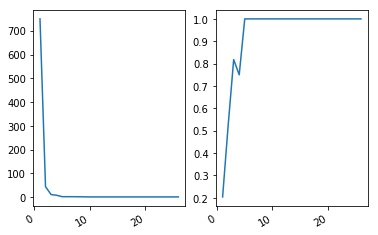

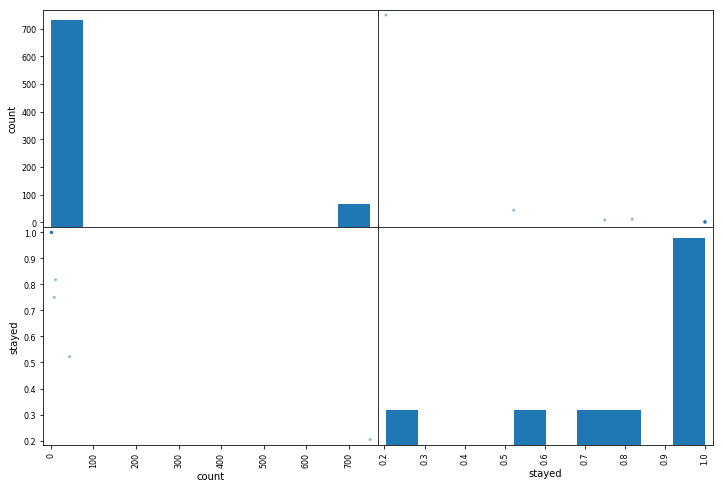

In [103]:
build_graphs_by_fights_count(duel, 5)

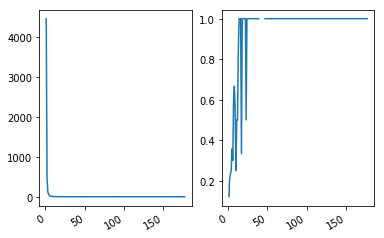

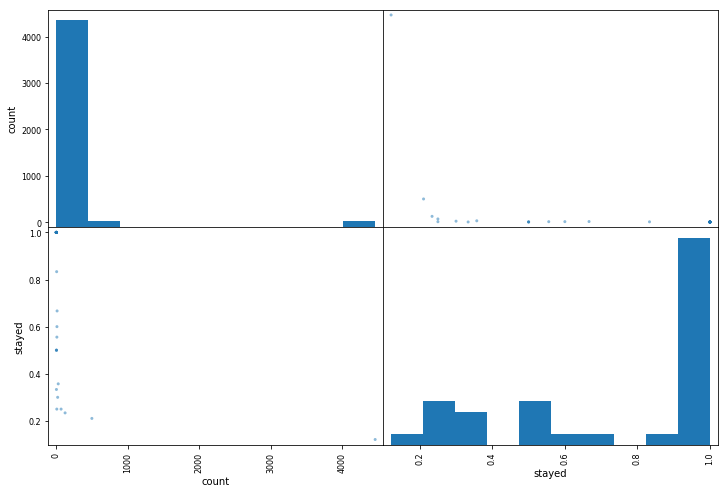

In [105]:
build_graphs_by_fights_count(events_battle, 50)

In [95]:
test = connect_labels(events_battle) #кол-во битв у игрока
test = get_stratas(test, 'count', 5) #группировка по количеству битв
test.loc[test['count'] > 1500]

,count,stayed
stratas,,
1.0,2480,0.106855


In [94]:
duel

,id,transaction_id,user_id,hero_id,status,duration,ai_share,experience,crystals,mana,location_id,opponent_type,opponent_user_id,opponent_hero_id,bot_template_id,opponent_race_id,kind
datetime,,,,,,,,,,,,,,,,,
2018-10-13 15:58:13,14035,84c764fa-b590-4bd3-be9c-684857421cf9,1a674288-28d0-495b-8c21-8c54f06088f6,06569dd4-dcf4-4b4b-a558-da3d7ce8e16d,win,0,0.0,0,0,10,duel,hero,630f30c8-0bd1-410e-afe0-8c979d3d1640,c681ecb4-f15f-418a-aada-eeb1afb57984,NaN,elf,duel
2018-10-13 16:02:19,14075,2c6838f7-e502-487a-af57-f498ecabb296,1a674288-28d0-495b-8c21-8c54f06088f6,06569dd4-dcf4-4b4b-a558-da3d7ce8e16d,win,0,0.0,0,0,10,duel,hero,eeebb108-0fff-4f5b-b196-20dd977b7258,69367208-3aca-45f7-9131-bc3570d09737,NaN,elf,duel
2018-10-13 04:32:43,9012,820add2f-192b-4e5d-9e84-eebb92b14799,40f0153b-2b89-4e92-91b1-9b3eead3fe62,a47c6267-ab8e-4a27-bd0d-aa061c5808f9,win,0,0.0,0,0,0,duel,hero,f3b97ed2-47f7-49b9-9068-59a08ade3170,c7c335ee-491d-493a-bc95-33ed95eb894f,NaN,human,duel
2018-10-13 15:14:23,13563,86f2bbaa-b505-444c-8deb-2d55a1a24f56,40f0153b-2b89-4e92-91b1-9b3eead3fe62,a47c6267-ab8e-4a27-bd0d-aa061c5808f9,loss,0,0.0,0,0,0,duel,hero,aaa99ee7-014c-4599-bf67-d478d222a04e,c0112c11-78c2-4e4b-98ff-a24957632831,NaN,human,duel
2018-10-26 01:16:33,887187,88df9c62-5533-4fff-a5d7-b5d884ae95ed,93af6cff-12d6-4f7f-9be0-a819379f3161,a7873301-1374-4b50-b5b9-ade50963dfaf,loss,0,0.0,0,0,12,duel,hero,3a7c9e69-1465-4d22-b7ca-fecb080173ce,8d7582eb-c157-4492-99a6-3fe90da17da4,NaN,human,duel
2018-10-13 04:32:43,9011,5024fd9d-1926-47d7-a06b-ca9754a4660a,f3b97ed2-47f7-49b9-9068-59a08ade3170,c7c335ee-491d-493a-bc95-33ed95eb894f,loss,0,0.0,0,0,0,duel,hero,40f0153b-2b89-4e92-91b1-9b3eead3fe62,a47c6267-ab8e-4a27-bd0d-aa061c5808f9,NaN,human,duel
2018-10-15 15:37:26,46669,390a2104-bf5d-4519-ae7f-1ce68c9476a1,f3b97ed2-47f7-49b9-9068-59a08ade3170,c7c335ee-491d-493a-bc95-33ed95eb894f,win,0,0.0,0,0,10,duel,hero,e2c71f63-b05d-4b6d-b761-10f27ea11b36,021f0b5d-2761-4ef1-80d6-61cf97e630ca,NaN,human,duel
2018-10-13 12:34:04,12040,9030948d-0374-4c92-8e78-2c66819e5e4d,1d7aca84-15d2-49d8-a577-44a1f48749b0,d7f6651c-c8d4-4f98-ac6c-b14bd515a2a5,win,0,0.0,0,0,12,duel,hero,5cb3cd74-ae5f-42bf-9af4-d122ed6edaa4,da4b33fe-0e55-4abd-83c0-42143482c6e1,NaN,elf,duel
2018-10-20 11:08:23,22349,a34bba82-7f01-4cd6-8985-a65a3abd1eb4,1d7aca84-15d2-49d8-a577-44a1f48749b0,d7f6651c-c8d4-4f98-ac6c-b14bd515a2a5,loss,0,0.0,0,0,0,duel,hero,c4b9b3a8-9f17-4ca8-9e46-a728ca78d078,6a015a16-f280-407d-9c7c-4f8c7e8c9bef,NaN,elf,duel


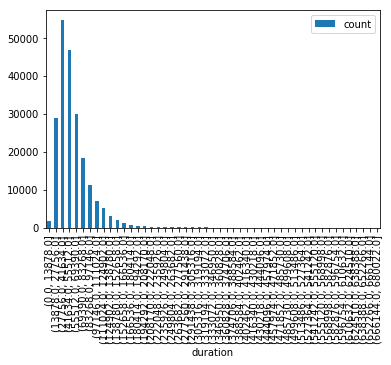

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def split_battle_counts_by_duration():
    max_battle_duration = events_battle['duration'].max()
    intervals = np.linspace(0, max_battle_duration, 50)
    groups = events_battle.groupby(pd.cut(events_battle['duration'], intervals)).count()
    groups['count'] = groups['id'].rename('count')
    return groups[['count']]
    
    
r = split_battle_counts_by_duration().plot.bar()
plt.show()